In [1]:
import numpy as np
from icecream import ic
from tqdm import tqdm


### Defining 2 functions for testing (we should use the one the professor provided in the final code)

In [2]:
#true functions for 2 and 3 variables
def true_f(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5
def true_f2(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5 + x[0] * x[2] / 10
def true_f3(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5 + x[0] * x[2] / 10 + np.exp(x[3] + np.cos(x[4])) / 20

In [3]:

# Define constants for dataset sizes.
TEST_SIZE = 10_000
TRAIN_SIZE = 100

# This function generates a problem dataset for true_f.
def gen_problem():
    # Generate a 2D validation set where x[0] and x[1] are random samples within specified ranges.
    x_validation = np.vstack(
        [
            np.random.random_sample(size=TEST_SIZE) * 2 * np.pi - np.pi,  # x[0] in range [-pi, pi]
            np.random.random_sample(size=TEST_SIZE) * 2 - 1,             # x[1] in range [-1, 1]
        ]
    )


    
    # Calculate the true outputs for the validation set using true_f.
    y_validation = true_f(x_validation)

    # Randomly select indexes for training data.
    train_indexes = np.random.choice(TEST_SIZE, size=TRAIN_SIZE, replace=False)

    # Extract training data using selected indexes.
    x_train = x_validation[:, train_indexes]
    y_train = y_validation[train_indexes]

    # Verify that y_train matches true_f applied to x_train.
    assert np.all(y_train == true_f(x_train)), "D'ho"

    return x_train, y_train

# This function generates a problem dataset for true_f2.
def gen_problem2():
    # Generate a 3D validation set where x[0], x[1], and x[2] are random samples within specified ranges.
    x_validation = np.vstack(
        [
            np.random.random_sample(size=TEST_SIZE) * np.exp(3) - np.exp(1),  # x[0] in range [e^1, e^3]
            np.random.random_sample(size=TEST_SIZE) * 2 - 1,                 # x[1] in range [-1, 1]
            np.random.random_sample(size=TEST_SIZE) * 57 - 1,               # x[2] in range [-1, 56]
        ]
    )

    # Calculate the true outputs for the validation set using true_f2.
    y_validation = true_f2(x_validation)

    # Randomly select indexes for training data.
    train_indexes = np.random.choice(TEST_SIZE, size=TRAIN_SIZE, replace=False)

    # Extract training data using selected indexes.
    x_train = x_validation[:, train_indexes]
    y_train = y_validation[train_indexes]

    # Verify that y_train matches true_f2 applied to x_train.
    assert np.all(y_train == true_f2(x_train)), "D'ho"

    return x_train, y_train

# Uncomment these lines to save and load a problem dataset.
# np.savez('problem_0.npz', x=x_train, y=y_train)
# problem = np.load('problem_0.npz')
# x = problem['x']
# y = problem['y']
def gen_problem3():
    # Generate a 5D validation set where x[0], x[1], x[2], x[3], and x[4] are random samples within specified ranges.
    x_validation = np.vstack(
        [
            np.random.random_sample(size=TEST_SIZE) * np.exp(3) - np.exp(1),  # x[0] in range [e^1, e^3]
            np.random.random_sample(size=TEST_SIZE) * 2 - 1,                 # x[1] in range [-1, 1]
            np.random.random_sample(size=TEST_SIZE) * 57 - 1,               # x[2] in range [-1, 56]
            np.random.random_sample(size=TEST_SIZE) * 2 * np.pi - np.pi,    # x[3] in range [-pi, pi]
            np.random.random_sample(size=TEST_SIZE) * 2 * np.pi - np.pi,    # x[4] in range [-pi, pi]
        ]
    )
    y_validation = true_f3(x_validation)
    train_indexes = np.random.choice(TEST_SIZE, size=TRAIN_SIZE, replace=False)
    x_train = x_validation[:, train_indexes]
    y_train = y_validation[train_indexes]
    assert np.all(y_train == true_f3(x_train)), "D'ho"
    return x_train, y_train












# Generate a problem dataset using gen_problem2.
problem = gen_problem3()
x = problem[0]  # Training inputs.
y = problem[1]  # Training outputs.

# Determine the number of variables in the training inputs.
number_vars = x.shape[0]

# Compute the Mean Squared Error between outputs from my_f and true outputs.



### Getting numpy functions

In [4]:
unary_ops = [
    np.negative,
    np.abs,
    # np.sqrt,
    # np.exp,
    # np.log,
    np.sin,
    np.cos,
    np.tan,
#     np.arcsin,
#     np.arccos,
#     np.arctan,
#     np.ceil,
#     np.floor
]

binary_ops = [
    np.add,
    np.subtract,
    np.multiply,
    np.divide,
    np.power,
    # np.maximum,
    # np.minimum,
    # np.mod
]


### Symbolic regression

  5%|▌         | 54/1000 [02:30<41:07,  2.61s/it] 

Start takeover after 53 gen


  9%|▉         | 89/1000 [04:19<40:33,  2.67s/it]  

Start takeover after 88 gen


 12%|█▏        | 115/1000 [05:44<37:06,  2.52s/it] 

Start takeover after 114 gen


 12%|█▏        | 121/1000 [06:13<48:01,  3.28s/it]  

Start takeover after 120 gen


 13%|█▎        | 128/1000 [06:48<47:04,  3.24s/it]  

Start takeover after 127 gen


 13%|█▎        | 134/1000 [07:19<49:46,  3.45s/it]  

Start takeover after 133 gen


 14%|█▍        | 142/1000 [07:55<42:32,  2.98s/it]  

Start takeover after 141 gen


 16%|█▌        | 160/1000 [08:56<35:04,  2.50s/it]  

Start takeover after 159 gen


 17%|█▋        | 173/1000 [09:43<34:49,  2.53s/it]  

Start takeover after 172 gen


 18%|█▊        | 180/1000 [10:16<42:01,  3.07s/it]  

Start takeover after 179 gen


 19%|█▊        | 187/1000 [10:48<41:36,  3.07s/it]  

Start takeover after 186 gen


 19%|█▉        | 194/1000 [11:21<41:50,  3.11s/it]  

Start takeover after 193 gen


 20%|██        | 201/1000 [11:52<40:31,  3.04s/it]  

Start takeover after 200 gen


 21%|██▏       | 213/1000 [12:38<29:03,  2.21s/it]  

Start takeover after 212 gen


 22%|██▏       | 218/1000 [13:05<45:51,  3.52s/it]  

Start takeover after 217 gen


 22%|██▏       | 224/1000 [13:35<42:35,  3.29s/it]  

Start takeover after 223 gen


 23%|██▎       | 229/1000 [14:03<46:51,  3.65s/it]  

Start takeover after 228 gen


 24%|██▎       | 235/1000 [14:33<42:43,  3.35s/it]  

Start takeover after 234 gen


 24%|██▍       | 245/1000 [15:10<28:21,  2.25s/it]  

Start takeover after 244 gen


 26%|██▌       | 255/1000 [15:47<27:32,  2.22s/it]  

Start takeover after 254 gen


 26%|██▌       | 260/1000 [16:16<46:12,  3.75s/it]  

Start takeover after 259 gen


 27%|██▋       | 271/1000 [16:59<27:47,  2.29s/it]  

Start takeover after 270 gen


 30%|██▉       | 296/1000 [18:14<26:59,  2.30s/it]  

Start takeover after 295 gen


 31%|███       | 309/1000 [19:02<26:34,  2.31s/it]  

Start takeover after 308 gen


 32%|███▏      | 317/1000 [19:40<33:22,  2.93s/it]  

Start takeover after 316 gen


 33%|███▎      | 332/1000 [20:32<25:58,  2.33s/it]  

Start takeover after 331 gen


 34%|███▍      | 339/1000 [21:04<31:49,  2.89s/it]  

Start takeover after 338 gen


 35%|███▍      | 346/1000 [21:47<37:26,  3.44s/it]  

Start takeover after 345 gen


 35%|███▌      | 353/1000 [22:19<32:24,  3.01s/it]  

Start takeover after 352 gen


 36%|███▌      | 361/1000 [22:54<28:55,  2.72s/it]  

Start takeover after 360 gen


 37%|███▋      | 368/1000 [23:27<31:20,  2.98s/it]  

Start takeover after 367 gen


 38%|███▊      | 376/1000 [24:03<28:28,  2.74s/it]  

Start takeover after 375 gen


 38%|███▊      | 383/1000 [24:35<29:53,  2.91s/it]  

Start takeover after 382 gen


 40%|███▉      | 397/1000 [25:21<21:44,  2.16s/it]  

Start takeover after 396 gen


 40%|████      | 404/1000 [25:53<28:46,  2.90s/it]

Start takeover after 403 gen


 41%|████      | 412/1000 [26:31<28:04,  2.86s/it]  

Start takeover after 411 gen


 42%|████▏     | 419/1000 [27:03<27:56,  2.89s/it]  

Start takeover after 418 gen


 43%|████▎     | 426/1000 [27:33<27:02,  2.83s/it]  

Start takeover after 425 gen


 43%|████▎     | 433/1000 [28:04<26:48,  2.84s/it]

Start takeover after 432 gen


 44%|████▍     | 440/1000 [28:36<27:28,  2.94s/it]  

Start takeover after 439 gen


 45%|████▍     | 447/1000 [29:08<27:12,  2.95s/it]

Start takeover after 446 gen


 45%|████▌     | 454/1000 [29:39<25:42,  2.83s/it]

Start takeover after 453 gen


 46%|████▌     | 460/1000 [30:09<28:58,  3.22s/it]

Start takeover after 459 gen


 47%|████▋     | 467/1000 [30:41<26:41,  3.00s/it]

Start takeover after 466 gen


 47%|████▋     | 474/1000 [31:13<24:54,  2.84s/it]

Start takeover after 473 gen


 48%|████▊     | 481/1000 [31:43<24:26,  2.83s/it]

Start takeover after 480 gen


 49%|████▉     | 488/1000 [32:16<25:08,  2.95s/it]

Start takeover after 487 gen


 50%|████▉     | 495/1000 [32:48<24:54,  2.96s/it]

Start takeover after 494 gen


 50%|█████     | 502/1000 [33:21<24:40,  2.97s/it]

Start takeover after 501 gen


 52%|█████▏    | 517/1000 [34:10<17:08,  2.13s/it]

Start takeover after 516 gen


 52%|█████▏    | 524/1000 [34:43<23:02,  2.90s/it]

Start takeover after 523 gen


 53%|█████▎    | 530/1000 [35:13<24:42,  3.15s/it]

Start takeover after 529 gen


 54%|█████▎    | 537/1000 [35:45<22:48,  2.96s/it]

Start takeover after 536 gen


 54%|█████▍    | 544/1000 [36:17<22:11,  2.92s/it]

Start takeover after 543 gen


 55%|█████▌    | 550/1000 [36:47<23:56,  3.19s/it]

Start takeover after 549 gen


 56%|█████▌    | 557/1000 [37:16<20:05,  2.72s/it]

Start takeover after 556 gen


 56%|█████▋    | 564/1000 [37:47<20:20,  2.80s/it]

Start takeover after 563 gen


 57%|█████▋    | 570/1000 [38:16<22:15,  3.11s/it]

Start takeover after 569 gen


 58%|█████▊    | 577/1000 [38:47<20:06,  2.85s/it]

Start takeover after 576 gen


 58%|█████▊    | 584/1000 [39:19<19:49,  2.86s/it]

Start takeover after 583 gen


 59%|█████▉    | 591/1000 [39:51<19:23,  2.84s/it]

Start takeover after 590 gen


 60%|█████▉    | 597/1000 [40:19<20:35,  3.07s/it]

Start takeover after 596 gen


 60%|██████    | 604/1000 [40:49<18:17,  2.77s/it]

Start takeover after 603 gen


 61%|██████    | 611/1000 [41:21<18:28,  2.85s/it]

Start takeover after 610 gen


 62%|██████▏   | 618/1000 [41:52<17:45,  2.79s/it]

Start takeover after 617 gen


 62%|██████▏   | 624/1000 [42:20<19:23,  3.09s/it]

Start takeover after 623 gen


 63%|██████▎   | 631/1000 [42:54<18:21,  2.98s/it]

Start takeover after 630 gen


 64%|██████▎   | 637/1000 [43:23<19:49,  3.28s/it]

Start takeover after 636 gen


 64%|██████▍   | 644/1000 [43:56<17:24,  2.94s/it]

Start takeover after 643 gen


 65%|██████▌   | 651/1000 [44:28<16:28,  2.83s/it]

Start takeover after 650 gen


 66%|██████▌   | 657/1000 [44:57<18:06,  3.17s/it]

Start takeover after 656 gen


 66%|██████▋   | 664/1000 [45:30<16:42,  2.98s/it]

Start takeover after 663 gen


 67%|██████▋   | 671/1000 [45:59<14:51,  2.71s/it]

Start takeover after 670 gen


 68%|██████▊   | 678/1000 [46:33<15:58,  2.98s/it]

Start takeover after 677 gen


 68%|██████▊   | 684/1000 [47:02<16:50,  3.20s/it]

Start takeover after 683 gen


 69%|██████▉   | 691/1000 [47:34<14:49,  2.88s/it]

Start takeover after 690 gen


 70%|██████▉   | 698/1000 [48:05<14:13,  2.83s/it]

Start takeover after 697 gen


 70%|███████   | 705/1000 [48:38<14:30,  2.95s/it]

Start takeover after 704 gen


 71%|███████   | 712/1000 [49:10<13:36,  2.83s/it]

Start takeover after 711 gen


 72%|███████▏  | 718/1000 [49:39<14:35,  3.11s/it]

Start takeover after 717 gen


 72%|███████▏  | 724/1000 [50:07<14:20,  3.12s/it]

Start takeover after 723 gen


 73%|███████▎  | 731/1000 [50:42<14:10,  3.16s/it]

Start takeover after 730 gen


 74%|███████▍  | 738/1000 [51:14<12:44,  2.92s/it]

Start takeover after 737 gen


 74%|███████▍  | 744/1000 [51:43<13:30,  3.17s/it]

Start takeover after 743 gen


 75%|███████▌  | 751/1000 [52:16<12:04,  2.91s/it]

Start takeover after 750 gen


 76%|███████▌  | 758/1000 [52:49<12:03,  2.99s/it]

Start takeover after 757 gen


 76%|███████▋  | 764/1000 [53:19<12:36,  3.21s/it]

Start takeover after 763 gen


 77%|███████▋  | 771/1000 [53:50<10:58,  2.88s/it]

Start takeover after 770 gen


 78%|███████▊  | 777/1000 [54:22<12:29,  3.36s/it]

Start takeover after 776 gen


 78%|███████▊  | 783/1000 [54:52<12:09,  3.36s/it]

Start takeover after 782 gen


 79%|███████▉  | 789/1000 [55:23<11:44,  3.34s/it]

Start takeover after 788 gen


 80%|███████▉  | 796/1000 [55:56<10:08,  2.98s/it]

Start takeover after 795 gen


 80%|████████  | 802/1000 [56:26<10:39,  3.23s/it]

Start takeover after 801 gen


 81%|████████  | 809/1000 [56:58<09:10,  2.88s/it]

Start takeover after 808 gen


 82%|████████▏ | 815/1000 [57:27<09:49,  3.19s/it]

Start takeover after 814 gen


 82%|████████▏ | 822/1000 [58:02<08:54,  3.00s/it]

Start takeover after 821 gen


 83%|████████▎ | 829/1000 [58:36<08:34,  3.01s/it]

Start takeover after 828 gen


 84%|████████▎ | 836/1000 [59:07<07:46,  2.84s/it]

Start takeover after 835 gen


 84%|████████▍ | 842/1000 [59:38<08:48,  3.34s/it]

Start takeover after 841 gen


 85%|████████▍ | 848/1000 [1:00:08<08:22,  3.31s/it]

Start takeover after 847 gen


 86%|████████▌ | 855/1000 [1:00:40<07:00,  2.90s/it]

Start takeover after 854 gen


 86%|████████▌ | 862/1000 [1:01:11<06:27,  2.80s/it]

Start takeover after 861 gen


 87%|████████▋ | 869/1000 [1:01:44<06:21,  2.91s/it]

Start takeover after 868 gen


 88%|████████▊ | 875/1000 [1:02:15<06:44,  3.24s/it]

Start takeover after 874 gen


 89%|████████▉ | 889/1000 [1:02:59<03:56,  2.13s/it]

Start takeover after 888 gen


 90%|████████▉ | 895/1000 [1:03:28<05:23,  3.08s/it]

Start takeover after 894 gen


 90%|█████████ | 901/1000 [1:03:58<05:23,  3.27s/it]

Start takeover after 900 gen


 91%|█████████ | 908/1000 [1:04:31<04:32,  2.96s/it]

Start takeover after 907 gen


 91%|█████████▏| 914/1000 [1:05:03<04:52,  3.41s/it]

Start takeover after 913 gen


 92%|█████████▏| 920/1000 [1:05:34<04:24,  3.31s/it]

Start takeover after 919 gen


 93%|█████████▎| 926/1000 [1:06:04<04:08,  3.36s/it]

Start takeover after 925 gen


 93%|█████████▎| 932/1000 [1:06:34<03:45,  3.32s/it]

Start takeover after 931 gen


 94%|█████████▍| 939/1000 [1:07:07<02:58,  2.92s/it]

Start takeover after 938 gen


 95%|█████████▍| 946/1000 [1:07:41<02:42,  3.01s/it]

Start takeover after 945 gen


 95%|█████████▌| 952/1000 [1:08:12<02:41,  3.37s/it]

Start takeover after 951 gen


 96%|█████████▌| 958/1000 [1:08:42<02:17,  3.27s/it]

Start takeover after 957 gen


 96%|█████████▋| 965/1000 [1:09:16<01:44,  2.99s/it]

Start takeover after 964 gen


 97%|█████████▋| 972/1000 [1:09:49<01:22,  2.95s/it]

Start takeover after 971 gen


 98%|█████████▊| 978/1000 [1:10:18<01:09,  3.14s/it]

Start takeover after 977 gen


 98%|█████████▊| 985/1000 [1:10:52<00:45,  3.01s/it]

Start takeover after 984 gen


 99%|█████████▉| 991/1000 [1:11:21<00:28,  3.13s/it]

Start takeover after 990 gen


100%|█████████▉| 997/1000 [1:11:50<00:09,  3.19s/it]

Start takeover after 996 gen


100%|██████████| 1000/1000 [1:12:15<00:00,  4.34s/it]

np.multiply(x0, np.multiply(np.add(np.add(np.multiply(x4, -0.38077239873450663), np.multiply(x3, x1)), x2), np.tan(np.tan(0.12550577676474137))))
Best Fitness: 23.328835453876735
Best Fitness History: [290.95243895862944, 269.24377563272463, 223.91340608315824, 160.71356805848944, 138.29853233923873, 137.93930402479455, 136.59815138692136, 136.58623971188723, 136.58618672131882, 136.54204555673797, 136.52373707361784, 136.51335105668204, 136.497469447812, 136.4844330476524, 136.46674288533166, 136.45998012719977, 136.43466168982198, 136.42859883747627, 136.42516988768384, 136.4232017143465, 136.41988922667124, 136.4195389029037, 114.27699334305305, 114.27692131253765, 114.27470502348126, 36.54036659054051, 35.593953315757105, 27.292264564946116, 26.04727897270551, 25.508022652192224, 25.00868120289558, 24.256227276469023, 23.970947588425002, 23.596467488322624, 23.55745182009173, 23.53542070601366, 23.333294070515112, 23.329793578010108, 23.329495598764268, 23.328846941585414, 23.32883

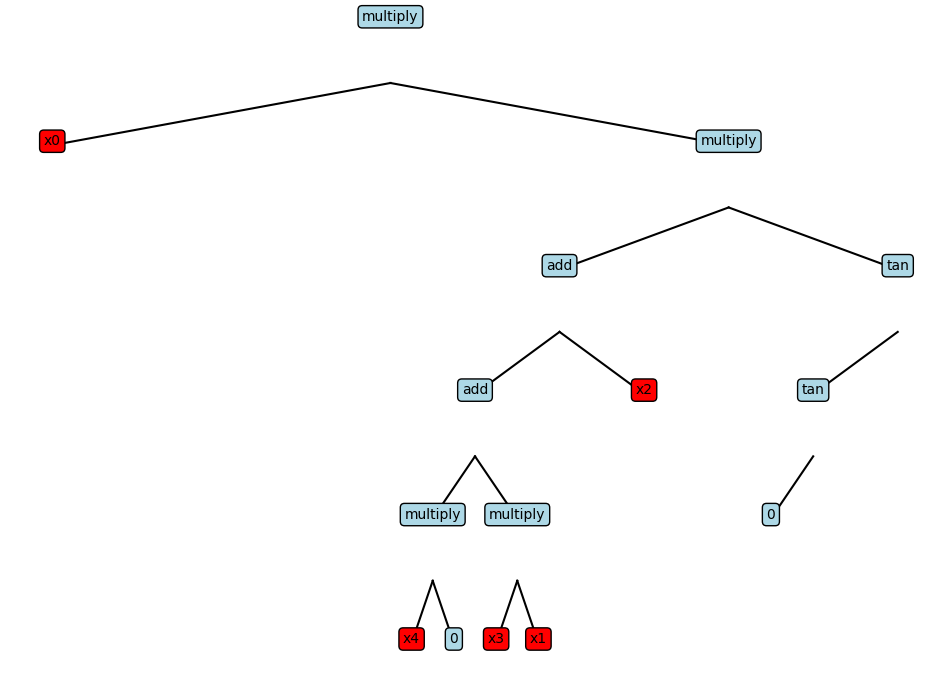

In [5]:
from tree import Tree

class SymbolicRegression:
    def __init__(self, population_size, max_generations, mutation_rate, elitism_size, grow_full_ratio,test_cases):
        self.population_size = population_size
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.best_fitness_history = []
        self.unary_ops = unary_ops
        self.binary_ops = binary_ops
        self.elitism_size = elitism_size
        self.grow_full_ratio = grow_full_ratio
        self.test_cases = test_cases

        self.population = [Tree("grow") for _ in range(int(population_size*self.grow_full_ratio))] + [Tree("full") for _ in range(int(population_size*(1-self.grow_full_ratio)))]

    
    # Parents selection
    def select_parents(self):
        return np.random.choice(self.population, 2)
    
    def select_parents_tournament(self):
        tournament_size = 7
        tournament = list(np.random.choice(self.population, tournament_size))
        tournament.sort(key=lambda x: x.fitness)
        return tournament[0], tournament[1]
    
    def select_parents(self):
        if np.random.rand() < 0:
            return self.select_parents_tournament()
        else:
            return self.fitness_proportional_selection()
        
    # def select_parents_lexicase(self):
    #     #select a random test case
    #     for()
    #     test_case = np.random.choice(self.test_cases)
    #     #sort the population based on the fitness of the test case
    #     self.population.sort(key=lambda x: Tree.evaluate_tree_recursive(x.root, test_case[0]))


class SymbolicRegression:
    def __init__(self, population_size, max_generations, mutation_rate, elitism_size, grow_full_ratio, test_cases):
        self.population_size = population_size
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.best_fitness_history = []
        self.unary_ops = unary_ops
        self.binary_ops = binary_ops
        self.elitism_size = elitism_size
        self.grow_full_ratio = grow_full_ratio
        self.test_cases = test_cases

        self.population = [Tree("grow") for _ in range(int(population_size * self.grow_full_ratio))] + \
                          [Tree("full") for _ in range(int(population_size * (1 - self.grow_full_ratio)))]

    # Parents selection
    def select_parents(self):
        if np.random.rand() < 0:
            return self.select_parents_tournament()
        else:
            return self.rank_based_selection()

    def select_parents_tournament(self):
        tournament_size = 7
        tournament = list(np.random.choice(self.population, tournament_size))
        tournament.sort(key=lambda x: x.fitness)
        return tournament[0], tournament[1]

    # def fitness_proportional_selection(self, n_elems=2): #TODO:   implement this
    def rank_based_selection(self, n_elems=2):
        """
        Rank-based selection method.
        Assigns probabilities based on inversed ranks instead of absolute fitness values.
        """
        fitnesses = np.array([tree.fitness for tree in self.population])
        ranks = np.argsort(fitnesses)
        inversed_ranks = len(fitnesses) - ranks
        probabilities = inversed_ranks / np.sum(inversed_ranks)
        return np.random.choice(self.population, n_elems, p=probabilities)




    def select_parents_roulette(self):
        fitnesses = [tree.fitness for tree in self.population]
        total_fitness = sum(fitnesses)
        probabilities = [f / total_fitness for f in fitnesses]
        parent1, parent2 = np.random.choice(self.population, size=2, p=probabilities)
        return parent1, parent2

    def mutate(self, tree):
        if np.random.rand() < self.mutation_rate:
            if np.random.rand() < 0.5:
                tree.mutate_subtree()
            else:
                tree.mutate_single_node()

    def offspring_generation(self):
        new_population = []

        # Elitism   
        elite_individuals = self.population[:self.elitism_size]
        new_population.extend(elite_individuals)

        
        #Main loop
        while len(new_population) < self.population_size:
                parent1, parent2 = self.select_parents()
                offsprings=[]
                if(np.random.rand() < 0.00):
                    parent_clone=parent1.copy_tree()
                    self.mutate(parent_clone)
                    Tree.collapse_branch(parent_clone.root)
                    offsprings.append(parent_clone)

                else:    
                    offspring1,offspring2=Tree.crossover(parent1, parent2)
                    if(offspring1 is not None or offspring2 is not None):
                        Tree.collapse_branch(offspring1.root)
                        Tree.collapse_branch(offspring2.root)
                    
                        # self.mutate(offspring1)
                        # self.mutate(offspring2)
            
                        offsprings.append(offspring1)
                        offsprings.append(offspring2)
                new_population.extend(offsprings)
        return new_population


    def evolve(self):
        best_tree = None
        best_fitness = np.inf
        take_over = False
        self.population.sort(key=lambda x: x.fitness) 
        for generation in tqdm(range(self.max_generations)):
            
            if take_over:
                #trasform the population in set and then back to list to remove duplicates
                self.population = list(set(self.population))
                #sort the population based on fitness
                self.population.sort(key=lambda x: x.fitness)
                self.population = self.population[:int(self.population_size*0.1)]
                new_trees = [Tree("full") for _ in range(int(self.population_size*0.3))]+[Tree("grow") for _ in range(int(self.population_size*0.3))]
                self.population.extend(new_trees)
            
            
            new_population=self.offspring_generation()
            

            self.population += new_population
            for tree in self.population:
                tree.compute_fitness()
            generation_fitnesses = [tree.fitness for tree in self.population]
            generation_best_fitness = min(generation_fitnesses)

            if generation_best_fitness < best_fitness:
                best_fitness = generation_best_fitness
                best_tree = self.population[np.argmin(generation_fitnesses)]
                self.best_fitness_history.append(best_fitness)
            #trim the population to the best population_size
            self.population.sort(key=lambda x: x.fitness)
            self.population = self.population[:self.population_size]
            # print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")
            

            n_best = [elem for elem in self.population if elem.fitness == self.population[0].fitness]
            take_over = False
            if len(n_best) > 0.9 * self.population_size:
                    take_over = True
                    print(f"Start takeover after {generation} gen")
            

         
                
                
        return best_tree, best_fitness


TREE_DEPTH = 5
VAR_NUM = 5
Tree.set_params(unary_ops, binary_ops, VAR_NUM, 75,TREE_DEPTH, x, y)
regressor = SymbolicRegression(
    population_size=300,
    max_generations=1000,
    mutation_rate=0.1,
    elitism_size=2,
    grow_full_ratio=0.7,
    test_cases=(x, y)
)

#TODO: fare in modo che la stessa variabile possa comparire piu' volte
best_tree, best_fitness = regressor.evolve()
print(best_tree.to_np_formula())
print(f"Best Fitness: {best_fitness}")
print(f"Best Fitness History: {regressor.best_fitness_history}, changed {len(regressor.best_fitness_history)} times")
print("Best Tree:")
best_tree.add_drawing()



# print(x.shape)
# # print(x)
# # print([x[0][0]]+[x[1][0]]+[x[2][0]])
# print(regressor.population[0].fitness)
# regressor.population[0].print_tree()
# print(regressor.population[0].evaluate_tree([x[0][0]]+[x[1][0]]+[x[2][0]]))
# print(regressor.population[0].evaluate_tree(x[:,0]))
# print("Best Tree:")
# best_tree.print_tree()
# print(f"Best Fitness: {best_fitness}")


In [6]:
#print every tree in the population

# for tree in regressor.population:

#     tree.add_drawing()


